# Image Classification in Python

In this assignment, we will implement image classification in python, and we will be using the Tensorflow package (a neural network library from Google). Throughout the assignment you'll see the term "keras" (this is a framework for defining neural networks).

In [80]:
import tensorflow as tf

## Getting Familiar With Image Data
We are going to play around with a digit recognition task. The MNIST database ( National Institute of Standards and Technology ) is a large database of handwritten digits that is commonly used for training various image processing systems. Tensorflow has convenient access to MNIST in its testing modules.

In [81]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

This code gives us a train and test split automatically, but first lets see what the data looks like. First, let's plot one of the training examples.

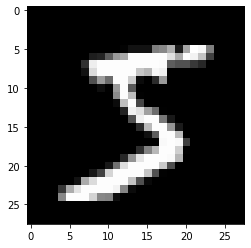

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(x_train[0], cmap='gray')

The corresponding label for this example is:

In [8]:
print(y_train[0])

5


The features are formatted as a 2D array 28x28:

In [9]:
x_train[0].shape

(28, 28)

The values of this array range from 0-255

In [10]:
x_train[0].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
x_train.shape #there are 60000 such examples

(60000, 28, 28)

## Ok Approach(es) To Image Classification
To understand the power of neural networks, let's start off with a bad approach to image classification. Let's simply use one of the "linear" models that we considered before. The first thing that we are going to do is to "flatten" these images into vectors. This creates a collection of vectors

In [12]:
x_train_flat = x_train.reshape(60000,28*28)
x_test_flat = x_test.reshape(10000,28*28)

Next, we are going to train a logistic regression model to predict the digit.

In [13]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(tol=0.01)
model.fit(x_train_flat[:10000], y_train[:10000])

/Users/sanjaykrishnan/Documents/cmsc21800/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanjaykrishnan/Documents/cmsc21800/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False)

Now, let's apply this model to the test set.

In [17]:
y_pred = model.predict(x_test_flat)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.86      0.88      1032
           3       0.86      0.88      0.87      1010
           4       0.89      0.90      0.89       982
           5       0.86      0.82      0.84       892
           6       0.92      0.93      0.92       958
           7       0.90      0.90      0.90      1028
           8       0.79      0.84      0.81       974
           9       0.86      0.84      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



So this actually works pretty well! some numbers are done better than others. One way to visualize the mispredictions is to calculate a confusion matrix.

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 938    0    4    3    0    9   13    3    7    3]
 [   2 1100    6    2    1    3    6    0   14    1]
 [   4   13  885   28   10    6   13   13   57    3]
 [   4    1   25  887    5   34    4   14   27    9]
 [   1    3    7    2  882    2   13   10   20   42]
 [  14    4    4   46    4  731   16    8   53   12]
 [  13    3    5    1   10   17  893    3   12    1]
 [   2    8   24    8    9    3    2  925    7   40]
 [   8   17   11   31   12   35   14    9  816   21]
 [   7   10    3   18   61    7    1   43   16  843]]


Not surprsingly a lot of 4s are misclassified as 9s etc. But we can do better! Let's visualize this data to get a better handle on what it looks like. Each example is 784 dimensional vector, let's apply dimensionality reduction to it.

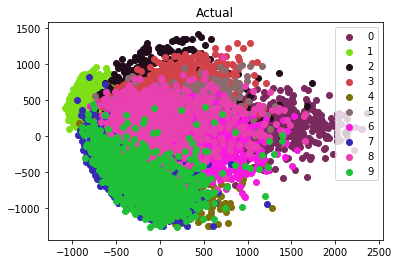

In [29]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X = pca.fit_transform(x_test_flat)

#visualize each digit with a color
plt.title('Actual')
legend = []
colors = []
for i in range(0,10):
    rgb = np.random.rand(3,)
    plt.scatter(X[y_test==i,0], X[y_test==i,1], c=[rgb])
    
    legend.append(str(i))
    colors.append(rgb)
    
plt.legend(legend)

That's kind of neat! all of the digits kind of bunch up together with others from their classes! Let's visualize the predictions now.

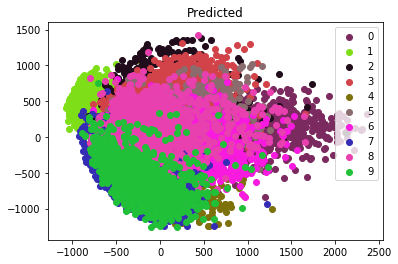

In [33]:
plt.title('Predicted')
legend = []
for i in range(0,10):
    plt.scatter(X[y_pred==i,0], X[y_pred==i,1], c=[colors[i]])
    legend.append(str(i))
plt.legend(legend)

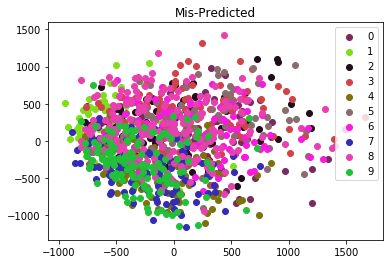

In [34]:
plt.title('Mis-Predicted')
legend = []
for i in range(0,10):
    plt.scatter(X[ (y_pred==i) & (y_pred!=y_test),0], X[ (y_pred==i) & (y_pred!=y_test) ,1], c=[colors[i]])
    legend.append(str(i))
plt.legend(legend)

## A Better Approach
Now, we will use a neural network to acheive the same goal. Let's first normalize our data between 0 and 1 so that the network trains faster.

In [82]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Then, we are going to turn the data into images

In [83]:
x_train = np.repeat(x_train.reshape(60000,28,28,1),3,axis=3)
x_test = np.repeat(x_test.reshape(10000,28,28,1),3, axis=3)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [87]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1316 - accuracy: 0.9588
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0251 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0194 - accuracy: 0.9940


Now let's look at how it works! The code below gives us a probability of each class.

In [91]:
raw_pred = model.predict(x_test)
tf.nn.softmax(raw_pred).numpy()

array([[1.5163129e-11, 4.3123524e-08, 9.1744567e-07, ..., 9.9999893e-01,
        1.1499951e-08, 1.3137321e-07],
       [7.2079615e-07, 6.7582988e-07, 9.9999857e-01, ..., 2.5664280e-11,
        4.1307287e-11, 8.9089146e-11],
       [2.0274065e-06, 9.9941266e-01, 4.8963511e-06, ..., 2.2524246e-05,
        4.7330823e-06, 2.3720215e-06],
       ...,
       [1.0582558e-14, 1.5734641e-11, 2.5708374e-10, ..., 1.0631788e-09,
        2.5536141e-11, 1.8266642e-11],
       [4.1705407e-06, 1.4442425e-09, 3.5803330e-10, ..., 1.7048533e-08,
        1.9575213e-03, 4.0434548e-05],
       [7.7135855e-06, 1.2608814e-07, 1.3963389e-06, ..., 5.2138269e-13,
        1.7611586e-07, 1.8639045e-07]], dtype=float32)

In [93]:
y_pred = np.argmax(tf.nn.softmax(raw_pred).numpy(),axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



It is 99% accurate!! Let's look at what it gets wrong.

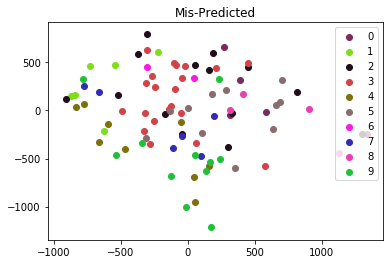

In [95]:
plt.title('Mis-Predicted')
legend = []
for i in range(0,10):
    plt.scatter(X[ (y_pred==i) & (y_pred!=y_test),0], X[ (y_pred==i) & (y_pred!=y_test) ,1], c=[colors[i]])
    legend.append(str(i))
plt.legend(legend)

Let's go through a couple of these mispredictions.

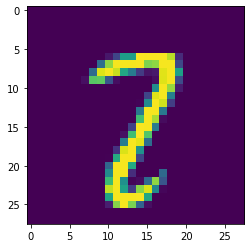

In [102]:
index = 1
test_mispredictions = x_test[(y_pred!=y_test),:,:,0]
test_mispredictions_actual = y_test[(y_pred!=y_test)]
test_mispredictions_predicted = y_pred[(y_pred!=y_test)]
plt.imshow(test_mispredictions[index])

In [103]:
print(test_mispredictions_actual[index], test_mispredictions_predicted[index])

2 7


## Building a More Sophisticated Application
Let's look at the predicted probabilities to help us understand how to handle mispredictions. Let's try to find out examples that are particularly ambiguous. How would you do this?

In [105]:
probs = tf.nn.softmax(raw_pred).numpy()
probs

array([[1.5163129e-11, 4.3123524e-08, 9.1744567e-07, ..., 9.9999893e-01,
        1.1499951e-08, 1.3137321e-07],
       [7.2079615e-07, 6.7582988e-07, 9.9999857e-01, ..., 2.5664280e-11,
        4.1307287e-11, 8.9089146e-11],
       [2.0274065e-06, 9.9941266e-01, 4.8963511e-06, ..., 2.2524246e-05,
        4.7330823e-06, 2.3720215e-06],
       ...,
       [1.0582558e-14, 1.5734641e-11, 2.5708374e-10, ..., 1.0631788e-09,
        2.5536141e-11, 1.8266642e-11],
       [4.1705407e-06, 1.4442425e-09, 3.5803330e-10, ..., 1.7048533e-08,
        1.9575213e-03, 4.0434548e-05],
       [7.7135855e-06, 1.2608814e-07, 1.3963389e-06, ..., 5.2138269e-13,
        1.7611586e-07, 1.8639045e-07]], dtype=float32)

The right measure is entropy.
$$
\mathbf{E}[X] = \sum_{i=1}^k i P(X == i)
$$

In [109]:
from scipy.stats import entropy
entropy([0.5,0.5])

0.6931471805599453

In [111]:
entropy([0.1,0.9])

0.3250829733914482

Low entropy predictions are most certain.

In [117]:
entropies = entropy(probs.T)

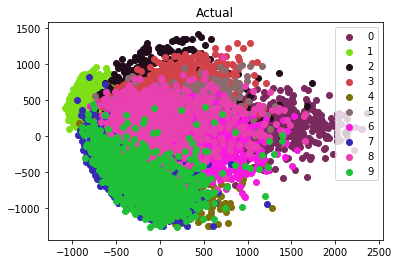

In [118]:
plt.title('Actual')
legend = []
for i in range(0,10):
    plt.scatter(X[y_test==i,0], X[y_test==i ,1], c=[colors[i]])
    legend.append(str(i))
plt.legend(legend)

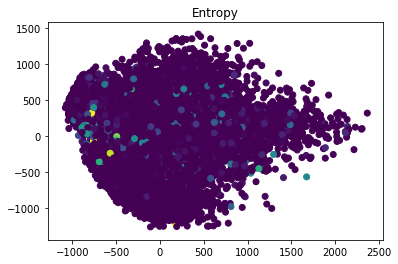

In [121]:
plt.title('Entropy')
for i in range(0,10):
    plt.scatter(X[y_test==i,0], X[y_test==i ,1], c=entropies[y_test==i])

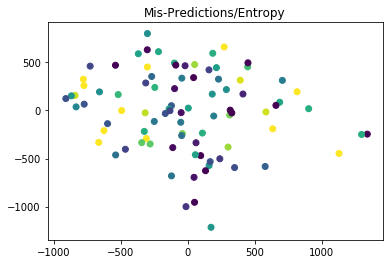

In [123]:
plt.title('Mis-Predictions/Entropy')
for i in range(0,10):
    plt.scatter(X[(y_pred==i) & (y_pred!=y_test),0], X[(y_pred==i) & (y_pred!=y_test) ,1], c=entropies[(y_pred==i) & (y_pred!=y_test)])

The majority are high-entropy examples!! You can detect uncertain cases.